### Ведение

#### Немного о том, про что ноутбук

Итак, настал этот прекрасный момент, чтобы изучить и применить на практике архитектуру Yolo11 для задачи классификации.

Я решил выделить ее в отдельный ноутбук для удобства. Все необходимые ячейки будут скопированы из прошлого ноутбука 01.Classification_Images(VGG + ResNet).

В этом ноутбуке будет глобально две части:
- Теоретическое знакомство с архитектурой Yolo;
- Практическое применение для решения задачи классификации(Повторить самому архитектуру + Дообучить готовую).

Задача:
- Изучить теоретически архитектуру;
- Ознакомиться с возможностями данной нейросети;
- Реализовать собственное дообучение=)

#### Список источников, откуда черпается информация

- [Документация на сайте Ultralitics](https://docs.ultralytics.com/models/yolo11/)
- [Официальный репозиторий](https://github.com/ultralytics/ultralytics)
- [Статья о развитии архитектуры Yolo](https://datasecrets.ru/articles/20)
- [How to Use Ultralytics YOLO11 for Object Detection and Tracking](https://www.youtube.com/watch?v=-JXwa-WlkU8&ab_channel=Ultralytics)
- [Imagine Classification Yolov11](https://docs.ultralytics.com/tasks/classify/#what-is-the-purpose-of-yolo11-in-image-classification)
- [Официальный гайд по установке Ultralitics](https://docs.ultralytics.com/quickstart/#install-ultralytics)
- [Архитектуры моделей на гитхаб](https://github.com/ultralytics/ultralytics/tree/main/ultralytics/cfg/models/11)
- []()

Обучающие туториалы
- [Братишки из Индии учат Training for Object Detection](https://www.youtube.com/watch?v=oO7sgQdX-mE&list=PLkz_y24mlSJad5ywmU2gy81LrsX5iNZXG&index=2&ab_channel=DSwithBappy)
- [YOLO11 Architecture - Detailed Explanation](https://www.youtube.com/watch?v=L9Va7Y9UT8E&ab_channel=Dr.PriyantoHidayatullah)
- [Build an AI/ML Tennis Analysis system with YOLO, PyTorch, and Key Point Extraction](https://www.youtube.com/watch?v=L23oIHZE14w&ab_channel=CodeInaJiffy)
- []()

### Теория

YOLO расшифровывается как You Only Look Once. Это широко известная архитектура компьютерного зрения, которая знаменита в том числе своим огромным количеством версий: первая из них вышла в 2016 году и решала только задачу детекции объектов на изображении, а последняя – одиннадцатая – появилась в сентябре этого года и уже представляет из себя целую фундаментальную модель, которую можно использовать для классификации, трекинга объектов на видео, задач pose estimation и тд. Все это – в реальном времени. 

Да, скорость – это именно то, что выделило YOLO среди других моделей восемь лет назад. До нее в мире CV существовали и другие архитектуры детекции. Например, в 2015 году лучшей считалась Faster R-CNN. Но, несмотря на слово "faster" в названии, эта моделька все еще тормизила на онлайн-тестах из-за своей нагроможденной структуры. Поэтому когда ученые из Вашингтона предложили YOLO, которая рвала конкурентов по времени и при этом показывала хорошие метрики, – это, фактически, перевернуло СV. За следующие 8 лет своего существования YOLO стала своеобразным трансформером во вселенной компьютерного зрения: ее любят и используют повсеместно. 

Архитектура Yolo v1

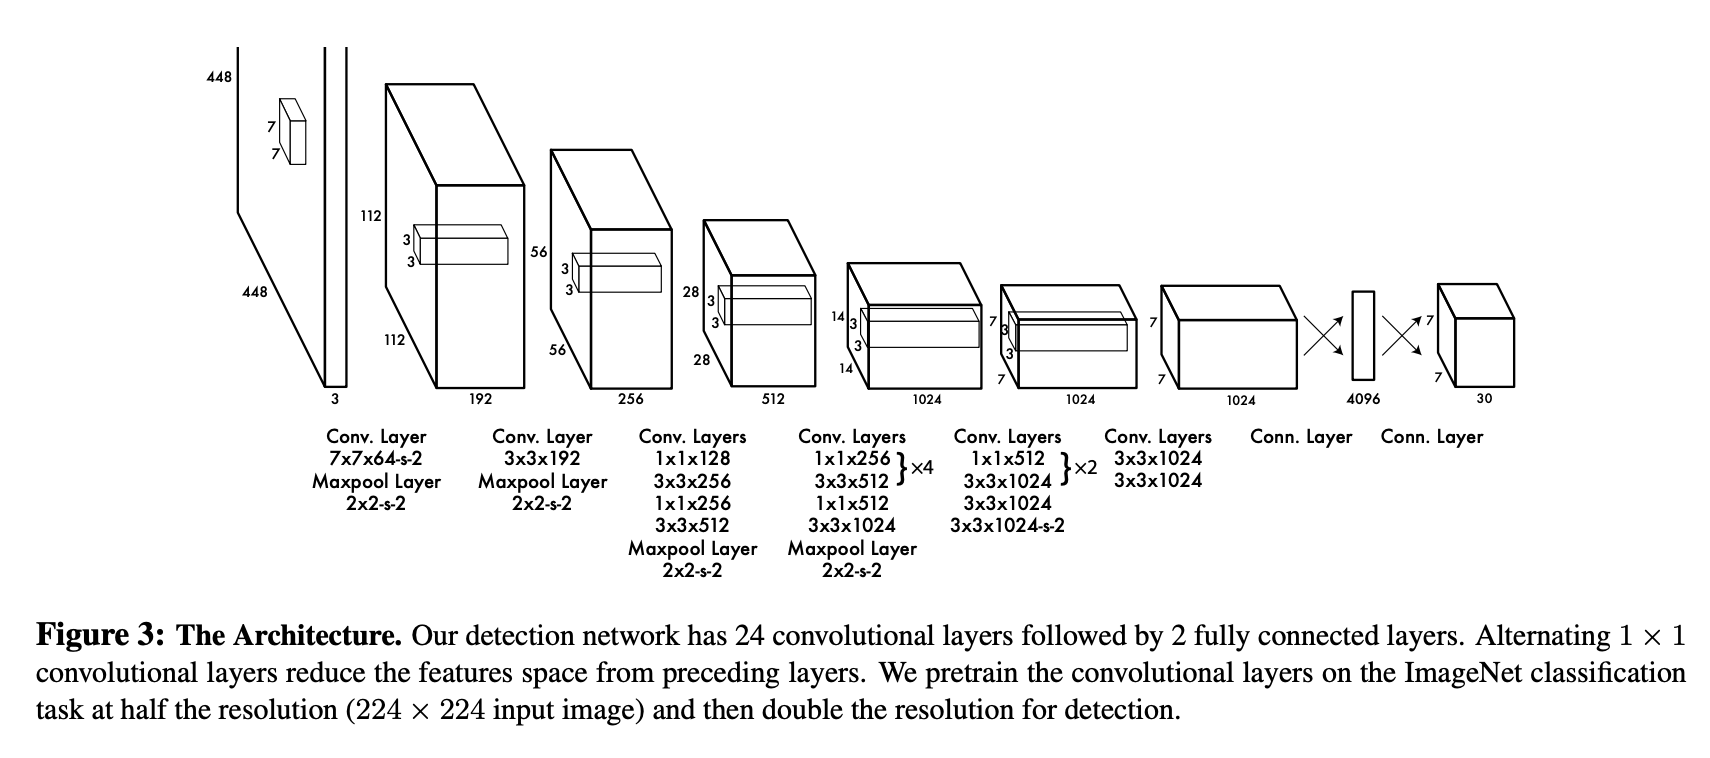
Архитектура Yolo v2

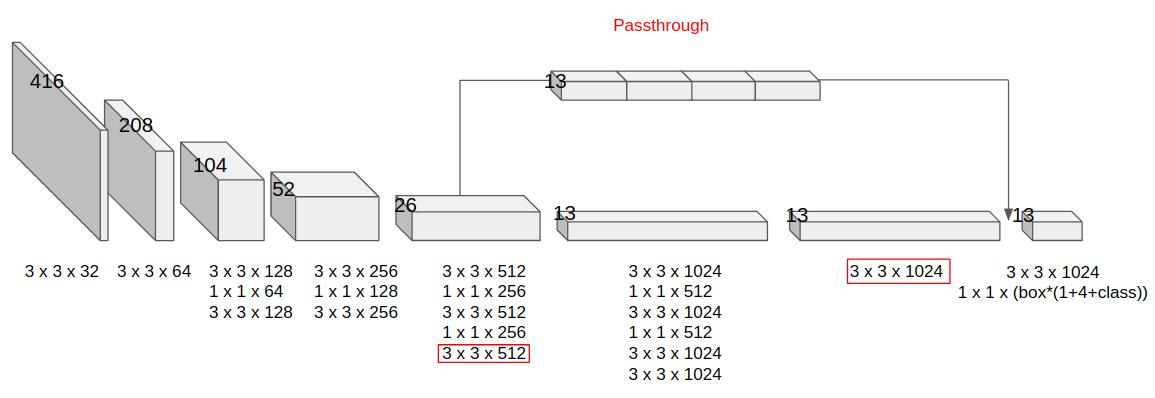
Архитектура Yolo v3

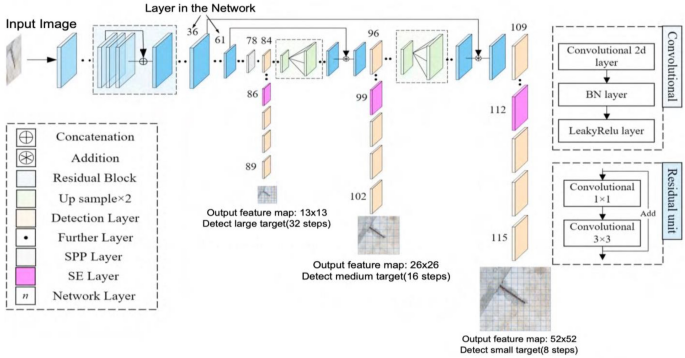

Немного про Yolo v8 - самая широкоиспользуемая модель линейки

В начале 2023 на арену снова вернулись Ultralytics, но на этот раз не с очередной версией пятой YOLO, а с новой YOLOv8. Но прежде, чем говорить о модели, давайте поговорим о том, что сделало восьмую модель такой популярной. Это не архитектура, не сказочные метрики, и даже не молниеносный инференс. Это совершенно новый репозиторий, который построен как единая платформа для обучения моделей детекции, сегментации и классификации. Компания выпустила пять моделей, каждая из которых может работать со всеми перечисленными задачами. Среди них была маленькая и шустрая YOLOv8 Nano и большая и самая точная YOLOv8 Extra Large (YOLOv8x). Все модели поддерживают много форматов экспорта и могут работать и на CPU, и на GPU. А еще YOLOv8 – это самое удобное API, которое совместимо и с командной строкой, и с Python.

Все последующие версии: YOLOv9, YOLOv10 и YOLOv11 тоже выпустила компания Ultralytics, сейчас у них негласная "монополия" на эту архитектуру. Последняя версия вышла совсем недавно: в октябре этого года. Однако сейчас обновление YOLO превратилось уже в скорее инженерную, а не исследовательскую задачу. Раз за разом разработчики оптимизируют инференс, сокращают количество параметров модели, работают над совместимость модели с новым железом и улучшают API. 

По предварительно полученной информации из статьи, сложилось впечатление. как будто лучше начать с изучения v8, т.к. она самая широкоиспользуемая)

Но, пока что надо ознакомиться, с дополнительной информацией про v11

Официальный график замеров моделей Yolo с офф сайта.

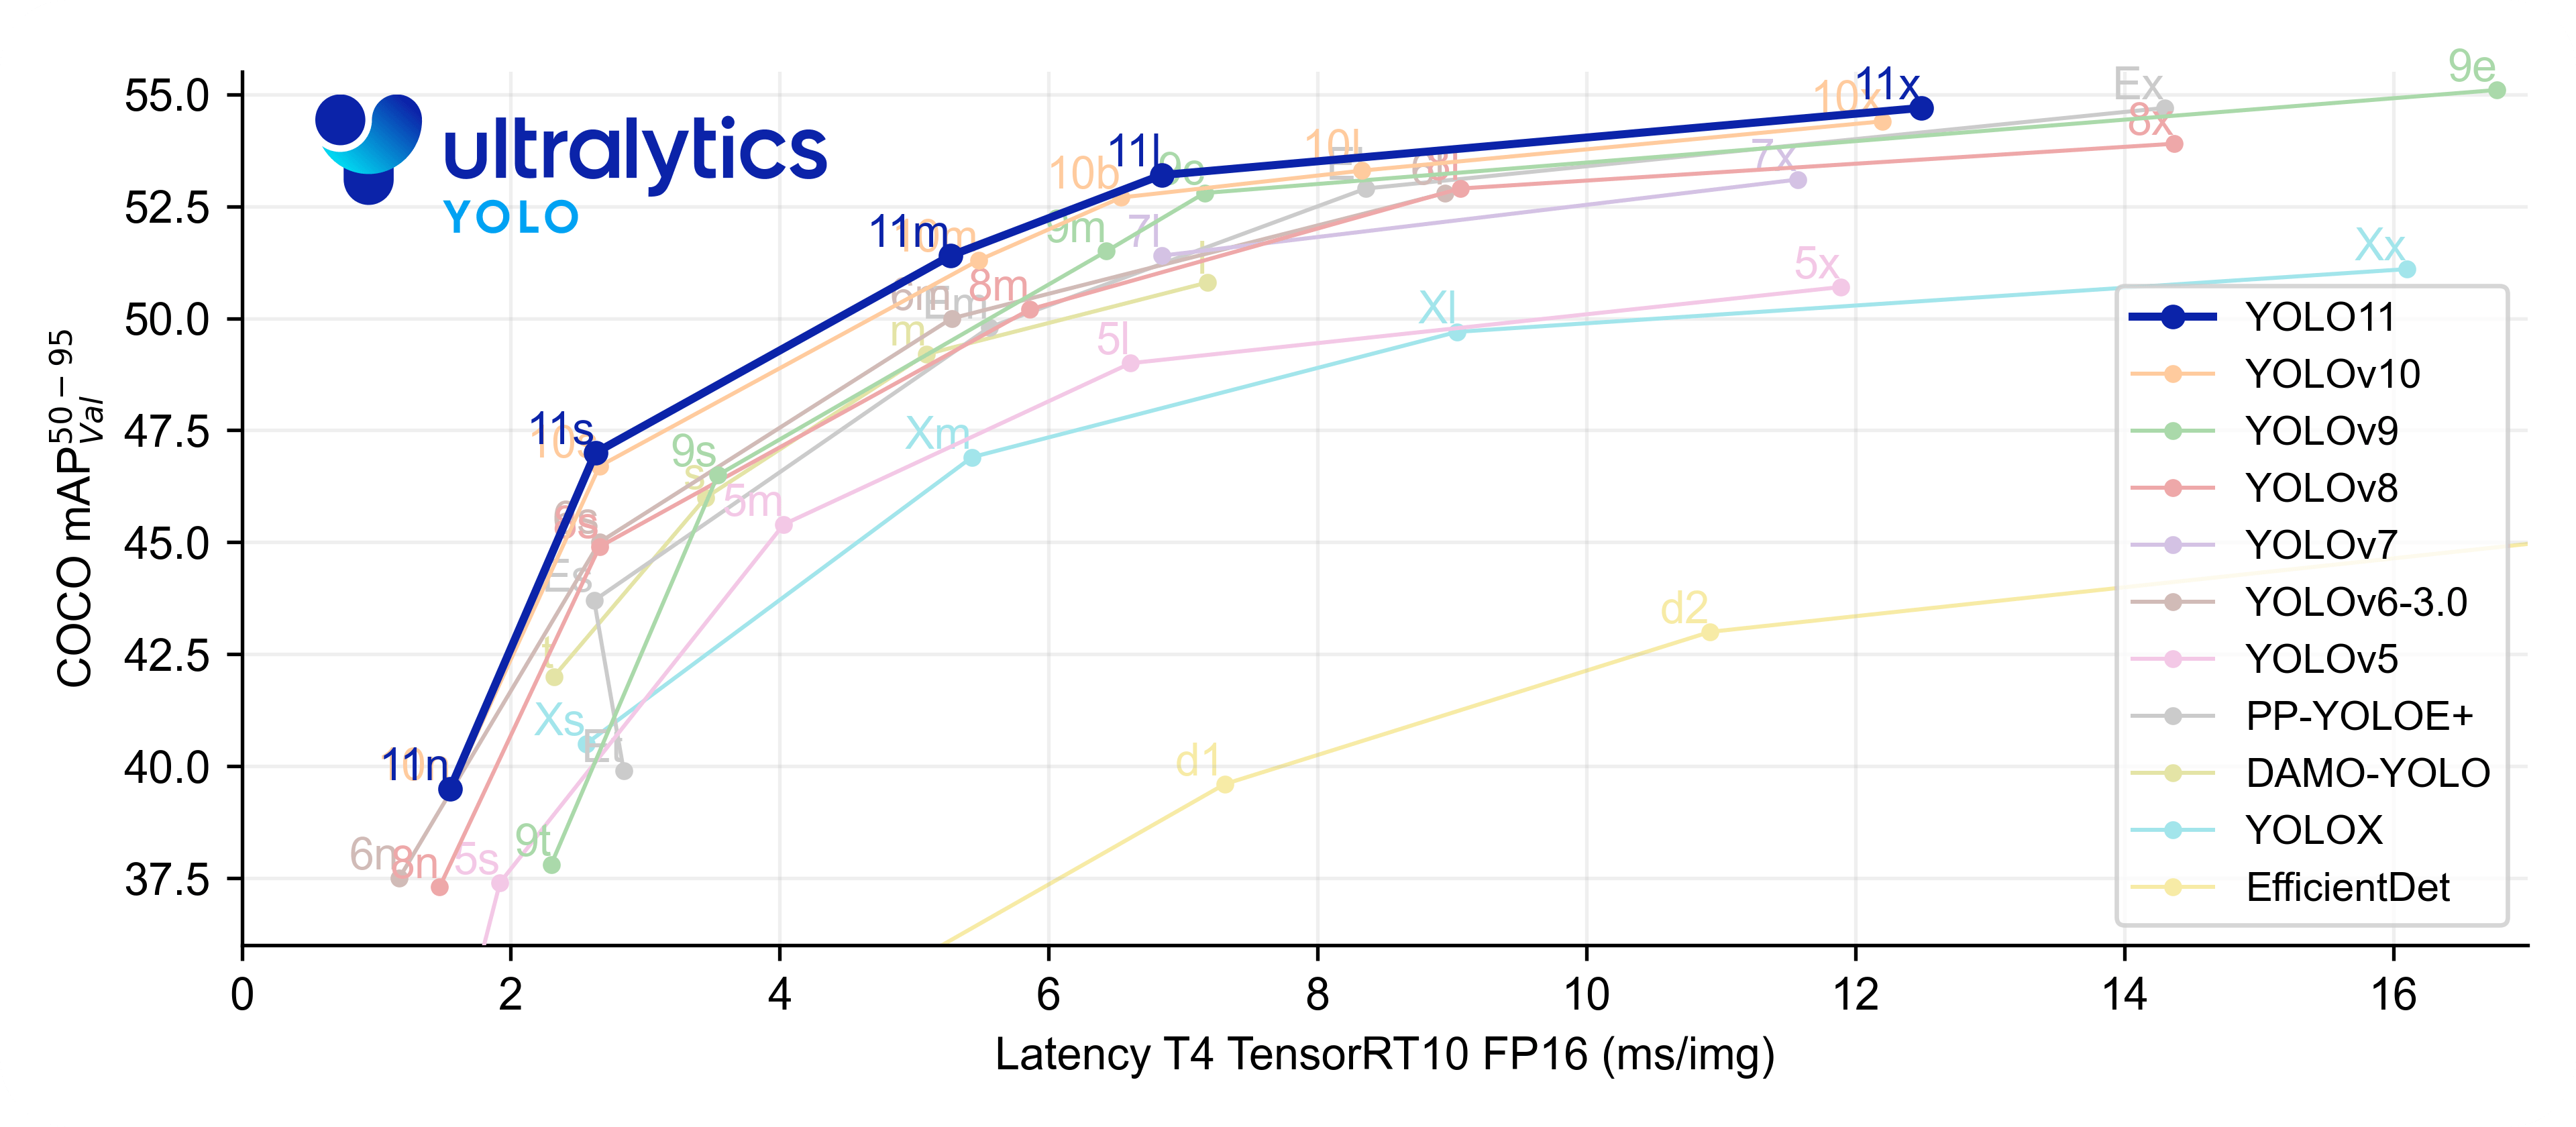

Данный график подтверждает слова из статьи о том, что v9,v10,v11 являются улучшениями v8.

"YOLO11 развивает универсальный модельный ряд, представленный в YOLOv8, предлагая расширенную поддержку различных задач компьютерного зрения" (с) С официального сайта.

С точки зрения эффективности глобального скачка нет, ну чтож) В любом случае, думаю стоит все таки попробовать v11, а в будущем, если понравится, то разобраться и изучить поэтапно все отличительные особенности предыдущих архитектур =)

### Практика

#### Необходимые установки и импорты
- [Официальный гайд по установке Ultralitics](https://docs.ultralytics.com/quickstart/#install-ultralytics)

In [2]:
# Install the ultralytics package from PyPI
# !pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 6.8 MB/s eta 0:00:007.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 32.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 42.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 21.8 MB/s eta 0:00:00


In [1]:
# проверим удастся ли импортировать модели YOLO)
from ultralytics import YOLO

In [8]:
# Создание новой модели YOLO (не предобученной) для классификации
model_Yolo11 = YOLO('yolo11n-cls.yaml')
model_Yolo11

YOLO11n-cls summary: 151 layers, 1,633,584 parameters, 1,633,584 gradients, 3.3 GFLOPs


YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

Я когда, впервые увидел архитектуру Yolo11 :D

YOLO11n-cls summary: 151 layers, 1,633,584 parameters, 1,633,584 gradients, 3.3 GFLOPs

![](https://media.giphy.com/media/iEvGGvvkXde3glumQQ/giphy.gif?cid=790b7611n44jdpd9y50mi6tmu507eu4ya9gngx8fnhefmkw2&ep=v1_gifs_search&rid=giphy.gif&ct=g)

Ну чтож, убедились, что все работает гуд. а значит, необходимо для начала повторить архитектуру Yolo ручками, для лучшего осознания, а затем уже заниматься TransferLearning

In [10]:
# Посмотрим на все слои в более удобочитаемом формате
for layer in model_Yolo11.state_dict():
    print(layer)

model.model.0.conv.weight
model.model.0.bn.weight
model.model.0.bn.bias
model.model.0.bn.running_mean
model.model.0.bn.running_var
model.model.0.bn.num_batches_tracked
model.model.1.conv.weight
model.model.1.bn.weight
model.model.1.bn.bias
model.model.1.bn.running_mean
model.model.1.bn.running_var
model.model.1.bn.num_batches_tracked
model.model.2.cv1.conv.weight
model.model.2.cv1.bn.weight
model.model.2.cv1.bn.bias
model.model.2.cv1.bn.running_mean
model.model.2.cv1.bn.running_var
model.model.2.cv1.bn.num_batches_tracked
model.model.2.cv2.conv.weight
model.model.2.cv2.bn.weight
model.model.2.cv2.bn.bias
model.model.2.cv2.bn.running_mean
model.model.2.cv2.bn.running_var
model.model.2.cv2.bn.num_batches_tracked
model.model.2.m.0.cv1.conv.weight
model.model.2.m.0.cv1.bn.weight
model.model.2.m.0.cv1.bn.bias
model.model.2.m.0.cv1.bn.running_mean
model.model.2.m.0.cv1.bn.running_var
model.model.2.m.0.cv1.bn.num_batches_tracked
model.model.2.m.0.cv2.conv.weight
model.model.2.m.0.cv2.bn.weigh

Закончу с необходимыми импортами и погоним ресерчить инфу об этой архитектуре, возможно удастся найти тех, кто уже повторял ее на Ютубчике))

In [35]:
# Стандартные загрузки для работы с папками и данными
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Для создания собственного класса загрузчика
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
from torchvision.transforms import v2
from torchvision import transforms, datasets
import torchvision.models as models

import torch
import torch.nn as nn
import torch.nn.functional as F

import time
import json
from tqdm import tqdm

from ultralytics import YOLO

#### Построение архитектуры Yolo11 с нуля ручками

Поресерчив инфу в интернете, я наткнулся буквально на несколько видео, которые глобально не разжевывают архитектуру с точки зрения написания кода самому. 

Встретил пару индусов и одного товарища, который просто объясняет архитектуру на английском (что тоже неплохо для понимания и усвоения). Но опять же, все пиарят свои платные курсы и прочие штуки) Образовательный контент - хорошая вещь. для вытягивания денег из людей)

[САМ ВСЕ СДЕЛАЮ!](https://www.youtube.com/watch?v=n_TfJ3NBRGA&ab_channel=RU_memes)

Конечно же сам, я ничего не сделал =)

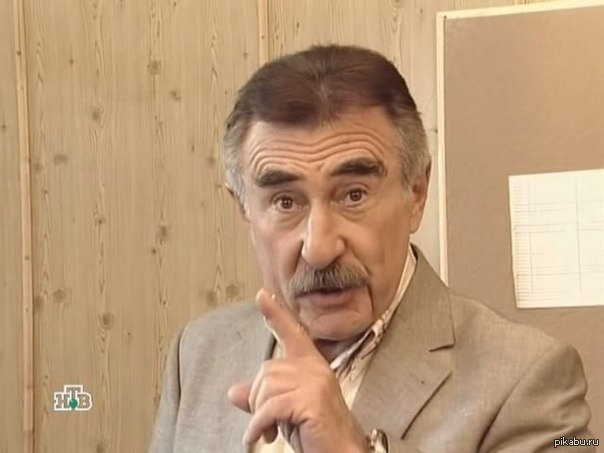

В общем, благо мы живем в прекрасное время существования чатГПТ и аналогов. Можно скормить вывод модели и чат ГПТ поможет построить ее архитектуру, чтобы лучше разобраться, заодно пояснит за нее)

##### **`class Conv(nn.Module)`**
- **Описание:** 
  Этот класс реализует базовый сверточный слой, который включает свертку (`Conv2d`), нормализацию батча (`BatchNorm2d`) и активационную функцию (`SiLU`).
- **Что делает:**
  1. Выполняет свертку с заданными параметрами (количество каналов, размер ядра, шаг, и т.д.).
  2. Применяет нормализацию батча для стабилизации обучения.
  3. Использует функцию активации `SiLU` для добавления нелинейности.
- **Зачем нужен:** 
  Это основной строительный блок сверточных нейронных сетей, который помогает извлекать признаки из входного изображения.

---

In [22]:
class Conv(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, stride, padding, groups=1):
        super().__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding, groups=groups, bias=False)
        self.bn = nn.BatchNorm2d(out_channels)
        self.act = nn.SiLU(inplace=True)

    def forward(self, x):
        x = self.conv(x)
        x = self.bn(x)
        out = self.act(x)
        return out

##### **`class Bottleneck(nn.Module)`**
- **Описание:**
  Этот класс реализует базовый бутстрепный блок, состоящий из двух последовательных сверточных операций.
- **Что делает:**
  1. Применяет последовательность операций `Conv-BN-SiLU` для уменьшения и восстановления размерности каналов.
  2. Поддерживает остаточную связь, позволяющую пропускать градиенты через блок, что упрощает обучение глубоких сетей.
- **Зачем нужен:**
  Блок используется для эффективного извлечения признаков и сокращения вычислительных затрат при сохранении информации.

---

In [28]:
class Bottleneck(nn.Module):
    def __init__(self, in_channels, hidden_channels):
        super().__init__()
        self.cv1 = Conv(in_channels, hidden_channels, kernel_size=3, stride=1, padding=1)
        self.cv2 = Conv(hidden_channels, in_channels, kernel_size=3, stride=1, padding=1)

    def forward(self, x):
        out = x + self.cv2(self.cv1(x))
        return out

##### **`class C3(nn.Module)`**
- **Описание:**
  Этот блок объединяет несколько слоев свертки и последовательность бутстрепных блоков (`Bottleneck`) в остаточной архитектуре.
- **Что делает:**
  1. Использует два последовательных сверточных слоя (`cv1` и `cv2`) для изменения размерности каналов.
  2. Включает модульный список с остаточными блоками, которые обучаются параллельно.
- **Зачем нужен:** 
  Уменьшает избыточность параметров и повышает эффективность модели, сохраняя высокую способность к генерализации.

---

In [24]:
class C3(nn.Module):
    def __init__(self, in_channels, out_channels, num_blocks):
        super().__init__()
        hidden_channels = out_channels // 2
        self.cv1 = Conv(in_channels, hidden_channels, kernel_size=1, stride=1, padding=0)
        self.cv2 = Conv(hidden_channels * 2, out_channels, kernel_size=1, stride=1, padding=0)
        self.m = nn.Sequential(*(Bottleneck(hidden_channels, hidden_channels // 2) for _ in range(num_blocks)))

    def forward(self, x):
            x1 = self.cv1(x)
            x2 = self.m(x1)

            out = torch.cat((x1, x2), dim=1)
            out = self.cv2(out)
            return out

##### **`class PSABlock(nn.Module)`**
- **Описание:**
  Этот класс реализует блок внимания с пространственной адаптацией (Position-Sensitive Attention).
- **Что делает:**
  1. Извлекает пространственные зависимости через механизм внимания.
  2. Применяет сверточные слои для уменьшения/увеличения размерности.
  3. Включает механизм позиционного кодирования через свертки с разделением на группы (`groups`).
- **Зачем нужен:**
  Улучшает способность модели концентрироваться на наиболее значимых областях изображения, что особенно важно для классификации сложных объектов.

---

In [25]:
class PSA(nn.Module):
    def __init__(self, in_channels):
        super().__init__()
        self.qkv = Conv(in_channels, in_channels * 2, kernel_size=1, stride=1, padding=0)
        self.proj = Conv(in_channels, in_channels, kernel_size=1, stride=1, padding=0)
        self.pe = Conv(in_channels, in_channels, kernel_size=3, stride=1, padding=0, groups=in_channels)
        self.ffn = nn.Sequential(
            Conv(in_channels, in_channels * 2, kernel_size=1, stride=1, padding=0),
            Conv(in_channels * 2, in_channels, kernel_size=1, stride=1, padding=0)
        ) 

    def forward(self, x):
        attn = self.proj(self.qkv(x) + self.pe(x))
        out = self.ffn(attn) + x
        return out

In [29]:
class MyYOLO11n(nn.Module):
    def __init__(self, num_classes):
        super().__init__()
        self.model = nn.Sequential(
            Conv(3, 16, 3, 2, 1),
            Conv(16, 32, 3, 2, 1),
            C3(32, 64, num_blocks=1),
            Conv(64, 64, 3, 2, 1),
            C3(64, 128, num_blocks=1),
            Conv(128, 128, 3, 2, 1),
            C3(128, 256, num_blocks=1),
            Conv(256, 256, 3, 2, 1),
            PSA(256),
            Conv(256, 1280, 1, 1, 0),
            nn.AdaptiveAvgPool2d(1),
            nn.Flatten(),
            nn.Linear(1280, num_classes)
        )

    def forward(self, x):
        return self.model(x)

Настало время проверить, что я там наковырял. насобирал.

Архитектура Yolo существенно сложнее, чем то, что я делал ранее. Но это, по идее новейшая архитектура. 

Отправная точка ясна, конечная(на данный момент) тоже ясна для освоения и изучения, так что в целом, я думаю, можно спокойно справиться и изучить данные архитектуры))

Выглядит, как будто бы похоже, но не совсем, надо поточнее сравнить с исходной.

Вероятно надо провести еще ресерч и поиск более детальной информации об архитектуре (код из репозитория на данном этапе моего развития не совсем понятен и только запутывает)

In [31]:
model = MyYOLO11n(80)
model

MyYOLO11n(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C3(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (m): Seq

In [32]:
# Посмотрим на все слои в более удобочитаемом формате
for layer in model.state_dict():
    print(layer)

model.0.conv.weight
model.0.bn.weight
model.0.bn.bias
model.0.bn.running_mean
model.0.bn.running_var
model.0.bn.num_batches_tracked
model.1.conv.weight
model.1.bn.weight
model.1.bn.bias
model.1.bn.running_mean
model.1.bn.running_var
model.1.bn.num_batches_tracked
model.2.cv1.conv.weight
model.2.cv1.bn.weight
model.2.cv1.bn.bias
model.2.cv1.bn.running_mean
model.2.cv1.bn.running_var
model.2.cv1.bn.num_batches_tracked
model.2.cv2.conv.weight
model.2.cv2.bn.weight
model.2.cv2.bn.bias
model.2.cv2.bn.running_mean
model.2.cv2.bn.running_var
model.2.cv2.bn.num_batches_tracked
model.2.m.0.cv1.conv.weight
model.2.m.0.cv1.bn.weight
model.2.m.0.cv1.bn.bias
model.2.m.0.cv1.bn.running_mean
model.2.m.0.cv1.bn.running_var
model.2.m.0.cv1.bn.num_batches_tracked
model.2.m.0.cv2.conv.weight
model.2.m.0.cv2.bn.weight
model.2.m.0.cv2.bn.bias
model.2.m.0.cv2.bn.running_mean
model.2.m.0.cv2.bn.running_var
model.2.m.0.cv2.bn.num_batches_tracked
model.3.conv.weight
model.3.bn.weight
model.3.bn.bias
model.3.bn

В общем то, несколько похожа, но не прям супер пупер, но как отправная точка для изучения архитектуры Yolo11 - пойдет.

В идеале необходимо будет доработать и полностью самому собрать модель. Данная задача не является приоритетной в рамках данного ноутбука, так что необходимо двигаться дальше.

#### Использование предобученной модели для задачи классификации. И попытки TransferLearning

In [36]:
# загрузка модели
model = YOLO('yolo11n-cls.pt')

100%|██████████████████████████████████████| 5.52M/5.52M [00:00<00:00, 16.6MB/s]


Вот это, конечно, удивительно, всего лишь 5.25М, на мой мало что повидавший мозг, такой размер предобученной модели произвел впечатление

In [37]:
model

YOLO(
  (model): ClassificationModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running